In [1]:
!pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 11.8 MB/s eta 0:00:00
  Created wheel for easydict: filename=easydict-1.10-py3-none-any.whl size=6492 sha256=3602e69ef339d80984b464373de15aaa115d5448a1c0568a67d8f20fcbf33b88
  Stored in directory: /home/ec2-user/.cache/pip/wheels/b7/e3/8c/f814820ac7ef5fd96f38759ce0d3dc51166a3169008b31da53
Successfully built easydict
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sagemaker 2.167.0 requires attrs<24,>=23.1.0, but you have attrs 21.4.0 which is incompatibl

In [2]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 25.7 MB/s eta 0:00:0000:0100:01


In [3]:
!pip install padelpy

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 30.8 MB/s eta 0:00:0000:0100:01


In [4]:
# Pandas 
import pandas as pd

# ChEMBL Database
from chembl_webresource_client.new_client import new_client

# NumPy
import numpy as np

#RD-Kit
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

# Seaborn
import seaborn as sns
sns.set(style='ticks')

# Matplot
import matplotlib.pyplot as plt

#Mann-Whitney test

def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu
  seed(1)
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]
  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]
  stat, p = mannwhitneyu(active, inactive)
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

# Padel Descriptor
from padelpy import padeldescriptor

# SKLearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor

# Glob
import glob



In [5]:

# import relevant libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [6]:
import sagemaker
import boto3
from sagemaker.amazon.amazon_estimator import get_image_uri 
from sagemaker.session import s3_input, Session
bucket_name = 'project1cc1' # <--- CHANGE THIS VARIABLE TO A UNIQUE NAME FOR YOUR BUCKET

In [7]:
# Target search
target = new_client.target
target_query = target.search('Neuraminidase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P03468', 'xref_name': None, 'xre...",Influenza A virus (A/Puerto Rico/8/1934(H1N1)),Neuraminidase,15.0,False,CHEMBL2051,"[{'accession': 'P03468', 'component_descriptio...",SINGLE PROTEIN,211044
1,"[{'xref_id': 'P03474', 'xref_name': None, 'xre...",Influenza B virus (strain B/Lee/1940),Neuraminidase,15.0,False,CHEMBL3377,"[{'accession': 'P03474', 'component_descriptio...",SINGLE PROTEIN,107412
2,"[{'xref_id': 'P03471', 'xref_name': None, 'xre...",Influenza A virus (A/Memphis/1/1971(H3N2)),Neuraminidase,15.0,False,CHEMBL6015,"[{'accession': 'P03471', 'component_descriptio...",SINGLE PROTEIN,383586
3,"[{'xref_id': 'B4URF0', 'xref_name': None, 'xre...",Influenza A virus,Neuraminidase,15.0,False,CHEMBL6135,"[{'accession': 'B4URF0', 'component_descriptio...",SINGLE PROTEIN,382835
4,[],Influenza A virus (A/Aichi/2/1968(H3N2)),Neuraminidase,15.0,False,CHEMBL1287607,"[{'accession': 'Q75VQ4', 'component_descriptio...",SINGLE PROTEIN,387139
5,[],Influenza A virus (strain A/Wilson-Smith/1933 ...,Neuraminidase,15.0,False,CHEMBL1287610,"[{'accession': 'P03470', 'component_descriptio...",SINGLE PROTEIN,381518
6,[],Influenza A virus,Neuraminidase,15.0,False,CHEMBL1667683,"[{'accession': 'Q6Q793', 'component_descriptio...",SINGLE PROTEIN,266827
7,[],Influenza A virus,Neuraminidase,15.0,False,CHEMBL1667684,"[{'accession': 'A5Z252', 'component_descriptio...",SINGLE PROTEIN,440390
8,[],Influenza A virus,Neuraminidase,15.0,False,CHEMBL1667685,"[{'accession': 'Q2LFS1', 'component_descriptio...",SINGLE PROTEIN,365124
9,[],Influenza A virus,Neuraminidase,15.0,False,CHEMBL1667686,"[{'accession': 'C4LRQ6', 'component_descriptio...",SINGLE PROTEIN,648213


In [8]:
selected_target = targets.target_chembl_id[3]
selected_target
## Confirmatory step to see if the ID of the selected molecules, matches to that of our desired molecule.

'CHEMBL6135'

In [9]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

## In this step we find molecules that have shown any sort of molecular interaction to our desired molecule 
## NOTE: Bioactivity can give both Benificial and Adverse affects? 
## Bio Activity is measured in terms of IC50, which is the amount of drug moleucle required to inhibit the biological process by half

In [10]:
df = pd.DataFrame.from_dict(res)

In [11]:
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1945626,[],CHEMBL891236,Inhibition of Influenza A virus type A H3N2 ne...,B,None,None,BAO_0000190,...,Influenza A virus,Neuraminidase,382835,None,None,IC50,uM,UO_0000065,None,48.73
1,None,None,1945659,[],CHEMBL891236,Inhibition of Influenza A virus type A H3N2 ne...,B,None,None,BAO_0000190,...,Influenza A virus,Neuraminidase,382835,None,None,Log IC50,None,UO_0000065,None,-3.55
2,None,None,1945660,[],CHEMBL891236,Inhibition of Influenza A virus type A H3N2 ne...,B,None,None,BAO_0000190,...,Influenza A virus,Neuraminidase,382835,None,None,IC50,uM,UO_0000065,None,1.06
3,None,None,1945661,[],CHEMBL891236,Inhibition of Influenza A virus type A H3N2 ne...,B,None,None,BAO_0000190,...,Influenza A virus,Neuraminidase,382835,None,None,Log IC50,None,UO_0000065,None,-5.49
4,None,None,1945662,[],CHEMBL891236,Inhibition of Influenza A virus type A H3N2 ne...,B,None,None,BAO_0000190,...,Influenza A virus,Neuraminidase,382835,None,None,IC50,uM,UO_0000065,None,48.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,"{'action_type': 'INHIBITOR', 'description': 'N...",None,23288378,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4838837,Inhibition of Influenza A virus (A/Anhui/1/200...,B,None,None,BAO_0000190,...,Influenza A virus,Neuraminidase,382835,None,None,IC50,nM,UO_0000065,None,326.0
1946,"{'action_type': 'INHIBITOR', 'description': 'N...",None,23288379,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4838837,Inhibition of Influenza A virus (A/Anhui/1/200...,B,None,None,BAO_0000190,...,Influenza A virus,Neuraminidase,382835,None,None,IC50,nM,UO_0000065,None,567.0
1947,"{'action_type': 'INHIBITOR', 'description': 'N...",None,23288380,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4838837,Inhibition of Influenza A virus (A/Anhui/1/200...,B,None,None,BAO_0000190,...,Influenza A virus,Neuraminidase,382835,None,None,IC50,nM,UO_0000065,None,4111.0
1948,"{'action_type': 'INHIBITOR', 'description': 'N...",None,23288381,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4838837,Inhibition of Influenza A virus (A/Anhui/1/200...,B,None,None,BAO_0000190,...,Influenza A virus,Neuraminidase,382835,None,None,IC50,nM,UO_0000065,None,1207.0


In [12]:
df.to_csv('human_sero_bioactivity_data_raw.csv', index=False)

In [13]:
import boto3
import pandas as pd
import io

# Initialize the Boto3 S3 client using the default credentials provider chain
s3_client = boto3.client('s3')

# Replace 'YOUR_BUCKET_NAME' with the actual name of your S3 bucket
bucket_name = 'project1cc1'

# Specify the local CSV file name
local_csv_file = 'human_sero_bioactivity_data_raw.csv'

# Specify the desired S3 file path
s3_file_path = 'human_sero_bioactivity_data_raw.csv'


# Write the DataFrame directly to a CSV string
csv_string = df.to_csv(index=False)

# Convert the CSV string to bytes
csv_bytes = bytes(csv_string, 'utf-8')
df = pd.read_csv(io.StringIO(csv_string))
# Upload the bytes to S3
s3_client.put_object(Bucket=bucket_name, Key=s3_file_path, Body=csv_bytes)

print(f'CSV file uploaded to {bucket_name}/{s3_file_path}')


CSV file uploaded to project1cc1/human_sero_bioactivity_data_raw.csv


In [14]:
df2 = df.standard_value.replace( 0, )
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2
#Notna (Only considers values that are non Zero in nature)
# Standard value is the IC50 value
# Canonical values describe each molecule in our raw data in a single line but include crucial information like structure
#which can further determine the function.

/tmp/ipykernel_15520/1753423127.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,1945626,[],CHEMBL891236,Inhibition of Influenza A virus type A H3N2 ne...,B,NaN,NaN,BAO_0000190,...,Influenza A virus,Neuraminidase,382835,NaN,NaN,IC50,uM,UO_0000065,NaN,48.73
1,NaN,NaN,1945659,[],CHEMBL891236,Inhibition of Influenza A virus type A H3N2 ne...,B,NaN,NaN,BAO_0000190,...,Influenza A virus,Neuraminidase,382835,NaN,NaN,Log IC50,NaN,UO_0000065,NaN,-3.55
2,NaN,NaN,1945660,[],CHEMBL891236,Inhibition of Influenza A virus type A H3N2 ne...,B,NaN,NaN,BAO_0000190,...,Influenza A virus,Neuraminidase,382835,NaN,NaN,IC50,uM,UO_0000065,NaN,1.06
3,NaN,NaN,1945661,[],CHEMBL891236,Inhibition of Influenza A virus type A H3N2 ne...,B,NaN,NaN,BAO_0000190,...,Influenza A virus,Neuraminidase,382835,NaN,NaN,Log IC50,NaN,UO_0000065,NaN,-5.49
4,NaN,NaN,1945662,[],CHEMBL891236,Inhibition of Influenza A virus type A H3N2 ne...,B,NaN,NaN,BAO_0000190,...,Influenza A virus,Neuraminidase,382835,NaN,NaN,IC50,uM,UO_0000065,NaN,48.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,23288378,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4838837,Inhibition of Influenza A virus (A/Anhui/1/200...,B,NaN,NaN,BAO_0000190,...,Influenza A virus,Neuraminidase,382835,NaN,NaN,IC50,nM,UO_0000065,NaN,326.00
1946,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,23288379,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4838837,Inhibition of Influenza A virus (A/Anhui/1/200...,B,NaN,NaN,BAO_0000190,...,Influenza A virus,Neuraminidase,382835,NaN,NaN,IC50,nM,UO_0000065,NaN,567.00
1947,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,23288380,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4838837,Inhibition of Influenza A virus (A/Anhui/1/200...,B,NaN,NaN,BAO_0000190,...,Influenza A virus,Neuraminidase,382835,NaN,NaN,IC50,nM,UO_0000065,NaN,4111.00
1948,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,23288381,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4838837,Inhibition of Influenza A virus (A/Anhui/1/200...,B,NaN,NaN,BAO_0000190,...,Influenza A virus,Neuraminidase,382835,NaN,NaN,IC50,nM,UO_0000065,NaN,1207.00


In [15]:
len(df2.canonical_smiles.unique())

772

In [16]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,1945626,[],CHEMBL891236,Inhibition of Influenza A virus type A H3N2 ne...,B,NaN,NaN,BAO_0000190,...,Influenza A virus,Neuraminidase,382835,NaN,NaN,IC50,uM,UO_0000065,NaN,48.73
2,NaN,NaN,1945660,[],CHEMBL891236,Inhibition of Influenza A virus type A H3N2 ne...,B,NaN,NaN,BAO_0000190,...,Influenza A virus,Neuraminidase,382835,NaN,NaN,IC50,uM,UO_0000065,NaN,1.06
4,NaN,NaN,1945662,[],CHEMBL891236,Inhibition of Influenza A virus type A H3N2 ne...,B,NaN,NaN,BAO_0000190,...,Influenza A virus,Neuraminidase,382835,NaN,NaN,IC50,uM,UO_0000065,NaN,48.01
6,NaN,NaN,1945664,[],CHEMBL891236,Inhibition of Influenza A virus type A H3N2 ne...,B,NaN,NaN,BAO_0000190,...,Influenza A virus,Neuraminidase,382835,NaN,NaN,IC50,uM,UO_0000065,NaN,3.57
8,NaN,NaN,1945666,[],CHEMBL891236,Inhibition of Influenza A virus type A H3N2 ne...,B,NaN,NaN,BAO_0000190,...,Influenza A virus,Neuraminidase,382835,NaN,NaN,IC50,uM,UO_0000065,NaN,16.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,23288378,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4838837,Inhibition of Influenza A virus (A/Anhui/1/200...,B,NaN,NaN,BAO_0000190,...,Influenza A virus,Neuraminidase,382835,NaN,NaN,IC50,nM,UO_0000065,NaN,326.00
1946,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,23288379,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4838837,Inhibition of Influenza A virus (A/Anhui/1/200...,B,NaN,NaN,BAO_0000190,...,Influenza A virus,Neuraminidase,382835,NaN,NaN,IC50,nM,UO_0000065,NaN,567.00
1947,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,23288380,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4838837,Inhibition of Influenza A virus (A/Anhui/1/200...,B,NaN,NaN,BAO_0000190,...,Influenza A virus,Neuraminidase,382835,NaN,NaN,IC50,nM,UO_0000065,NaN,4111.00
1948,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,23288381,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4838837,Inhibition of Influenza A virus (A/Anhui/1/200...,B,NaN,NaN,BAO_0000190,...,Influenza A virus,Neuraminidase,382835,NaN,NaN,IC50,nM,UO_0000065,NaN,1207.00


In [17]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

# for the scope of the study we have only considered the 3 columns 
# Uinque identifier of the query molecule, Chemical structure and IC50 values

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL397352,CC(=O)N1C[C@H](O)C[C@@H]1C(=O)O,48730.0
2,CHEMBL1229,CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@@...,1060.0
4,CHEMBL392199,COC(=O)[C@@H]1C[C@@H](N)CN1C(=O)[C@@H](N)CC(C)C,48010.0
6,CHEMBL414724,N[C@H]1C[C@@H](C(=O)NO)N(C(=O)Cc2ccccc2Nc2c(Cl...,3570.0
8,CHEMBL393969,N[C@H]1C[C@@H](C(=O)O)N(C(=O)Cc2ccccc2Nc2c(Cl)...,16230.0
...,...,...,...
1945,CHEMBL4861754,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCc2cc...,326.0
1946,CHEMBL4871590,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCc2cc...,567.0
1947,CHEMBL4872588,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCC2CC...,4111.0
1948,CHEMBL4863007,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNC2CCO...,1207.0


In [18]:
df3.to_csv('human_sero_bioactivity_data_02_preprocessed.csv', index=False)

In [19]:
import boto3
import pandas as pd

# Initialize the Boto3 S3 client using the default credentials provider chain
s3_client = boto3.client('s3')

# Replace 'YOUR_BUCKET_NAME' with the actual name of your S3 bucket
bucket_name = 'project1cc1'

# Specify the local CSV file name
local_csv_file = 'human_sero_bioactivity_data_02_preprocessed.csv'

# Specify the desired S3 file path
s3_file_path = 'human_sero_bioactivity_data_02_preprocessed.csv'


# Write the DataFrame directly to a CSV string
csv_string = df3.to_csv(index=False)

# Convert the CSV string to bytes
csv_bytes = bytes(csv_string, 'utf-8')
df4 = pd.read_csv(io.StringIO(csv_string))
# Upload the bytes to S3
s3_client.put_object(Bucket=bucket_name, Key=s3_file_path, Body=csv_bytes)

print(f'CSV file uploaded to {bucket_name}/{s3_file_path}')


CSV file uploaded to project1cc1/human_sero_bioactivity_data_02_preprocessed.csv


In [20]:
#df4 = pd.read_csv('human_sero_bioactivity_data_02_preprocessed.csv')

In [21]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [22]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL397352,CC(=O)N1C[C@H](O)C[C@@H]1C(=O)O,48730.0,inactive
1,CHEMBL1229,CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@@...,1060.0,intermediate
2,CHEMBL392199,COC(=O)[C@@H]1C[C@@H](N)CN1C(=O)[C@@H](N)CC(C)C,48010.0,inactive
3,CHEMBL414724,N[C@H]1C[C@@H](C(=O)NO)N(C(=O)Cc2ccccc2Nc2c(Cl...,3570.0,intermediate
4,CHEMBL393969,N[C@H]1C[C@@H](C(=O)O)N(C(=O)Cc2ccccc2Nc2c(Cl)...,16230.0,inactive
...,...,...,...,...
767,CHEMBL4861754,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCc2cc...,326.0,active
768,CHEMBL4871590,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCc2cc...,567.0,active
769,CHEMBL4872588,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCC2CC...,4111.0,intermediate
770,CHEMBL4863007,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNC2CCO...,1207.0,intermediate


In [23]:
df5.to_csv('human_sero_bioactivity_03_data_curated.csv', index=False)

In [24]:
import boto3
import pandas as pd

# Initialize the Boto3 S3 client using the default credentials provider chain
s3_client = boto3.client('s3')

# Replace 'YOUR_BUCKET_NAME' with the actual name of your S3 bucket
bucket_name = 'project1cc1'

# Specify the local CSV file name
local_csv_file = 'human_sero_bioactivity_03_data_curated.csv'

# Specify the desired S3 file path
s3_file_path = 'human_sero_bioactivity_03_data_curated.csv'


# Write the DataFrame directly to a CSV string
csv_string = df5.to_csv(index=False)

# Convert the CSV string to bytes
csv_bytes = bytes(csv_string, 'utf-8')
dfa = pd.read_csv(io.StringIO(csv_string))
# Upload the bytes to S3
s3_client.put_object(Bucket=bucket_name, Key=s3_file_path, Body=csv_bytes)

print(f'CSV file uploaded to {bucket_name}/{s3_file_path}')


CSV file uploaded to project1cc1/human_sero_bioactivity_03_data_curated.csv


In [25]:
dfa = pd.read_csv('human_sero_bioactivity_03_data_curated.csv')
dfa

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL397352,CC(=O)N1C[C@H](O)C[C@@H]1C(=O)O,48730.0,inactive
1,CHEMBL1229,CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@@...,1060.0,intermediate
2,CHEMBL392199,COC(=O)[C@@H]1C[C@@H](N)CN1C(=O)[C@@H](N)CC(C)C,48010.0,inactive
3,CHEMBL414724,N[C@H]1C[C@@H](C(=O)NO)N(C(=O)Cc2ccccc2Nc2c(Cl...,3570.0,intermediate
4,CHEMBL393969,N[C@H]1C[C@@H](C(=O)O)N(C(=O)Cc2ccccc2Nc2c(Cl)...,16230.0,inactive
...,...,...,...,...
767,CHEMBL4861754,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCc2cc...,326.0,active
768,CHEMBL4871590,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCc2cc...,567.0,active
769,CHEMBL4872588,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCC2CC...,4111.0,intermediate
770,CHEMBL4863007,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNC2CCO...,1207.0,intermediate


In [26]:
df_no_smiles = dfa.drop(columns='canonical_smiles')

In [27]:
smiles = []

for i in dfa.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

## Bring canonical notation to the last column for ease in data analysis and visualzation

In [28]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL397352,48730.0,inactive,CC(=O)N1C[C@H](O)C[C@@H]1C(=O)O
1,CHEMBL1229,1060.0,intermediate,CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@@...
2,CHEMBL392199,48010.0,inactive,COC(=O)[C@@H]1C[C@@H](N)CN1C(=O)[C@@H](N)CC(C)C
3,CHEMBL414724,3570.0,intermediate,N[C@H]1C[C@@H](C(=O)NO)N(C(=O)Cc2ccccc2Nc2c(Cl...
4,CHEMBL393969,16230.0,inactive,N[C@H]1C[C@@H](C(=O)O)N(C(=O)Cc2ccccc2Nc2c(Cl)...
...,...,...,...,...
767,CHEMBL4861754,326.0,active,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCc2cc...
768,CHEMBL4871590,567.0,active,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCc2cc...
769,CHEMBL4872588,4111.0,intermediate,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCC2CC...
770,CHEMBL4863007,1207.0,intermediate,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNC2CCO...


In [29]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [30]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski
## we get all this information from cananonical smiles data

,MW,LogP,NumHDonors,NumHAcceptors
0,173.168,-0.9473,2.0,3.0
1,312.410,1.2854,2.0,5.0
2,257.334,-0.5390,2.0,5.0
3,423.300,2.7131,4.0,5.0
4,408.285,3.2923,3.0,4.0
...,...,...,...,...
767,462.547,1.8608,5.0,6.0
768,462.547,1.8608,5.0,6.0
769,396.488,1.0620,5.0,5.0
770,426.514,0.8310,5.0,6.0


In [31]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,173.168,-0.9473,2.0,3.0
1,312.410,1.2854,2.0,5.0
2,257.334,-0.5390,2.0,5.0
3,423.300,2.7131,4.0,5.0
4,408.285,3.2923,3.0,4.0
...,...,...,...,...
767,462.547,1.8608,5.0,6.0
768,462.547,1.8608,5.0,6.0
769,396.488,1.0620,5.0,5.0
770,426.514,0.8310,5.0,6.0


In [32]:
dfa

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL397352,CC(=O)N1C[C@H](O)C[C@@H]1C(=O)O,48730.0,inactive
1,CHEMBL1229,CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@@...,1060.0,intermediate
2,CHEMBL392199,COC(=O)[C@@H]1C[C@@H](N)CN1C(=O)[C@@H](N)CC(C)C,48010.0,inactive
3,CHEMBL414724,N[C@H]1C[C@@H](C(=O)NO)N(C(=O)Cc2ccccc2Nc2c(Cl...,3570.0,intermediate
4,CHEMBL393969,N[C@H]1C[C@@H](C(=O)O)N(C(=O)Cc2ccccc2Nc2c(Cl)...,16230.0,inactive
...,...,...,...,...
767,CHEMBL4861754,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCc2cc...,326.0,active
768,CHEMBL4871590,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCc2cc...,567.0,active
769,CHEMBL4872588,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCC2CC...,4111.0,intermediate
770,CHEMBL4863007,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNC2CCO...,1207.0,intermediate


In [33]:
df_combined = pd.concat([dfa,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL397352,CC(=O)N1C[C@H](O)C[C@@H]1C(=O)O,48730.0,inactive,173.168,-0.9473,2.0,3.0
1,CHEMBL1229,CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@@...,1060.0,intermediate,312.410,1.2854,2.0,5.0
2,CHEMBL392199,COC(=O)[C@@H]1C[C@@H](N)CN1C(=O)[C@@H](N)CC(C)C,48010.0,inactive,257.334,-0.5390,2.0,5.0
3,CHEMBL414724,N[C@H]1C[C@@H](C(=O)NO)N(C(=O)Cc2ccccc2Nc2c(Cl...,3570.0,intermediate,423.300,2.7131,4.0,5.0
4,CHEMBL393969,N[C@H]1C[C@@H](C(=O)O)N(C(=O)Cc2ccccc2Nc2c(Cl)...,16230.0,inactive,408.285,3.2923,3.0,4.0
...,...,...,...,...,...,...,...,...
767,CHEMBL4861754,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCc2cc...,326.0,active,462.547,1.8608,5.0,6.0
768,CHEMBL4871590,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCc2cc...,567.0,active,462.547,1.8608,5.0,6.0
769,CHEMBL4872588,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCC2CC...,4111.0,intermediate,396.488,1.0620,5.0,5.0
770,CHEMBL4863007,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNC2CCO...,1207.0,intermediate,426.514,0.8310,5.0,6.0


In [34]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop(columns=['standard_value_norm'])
        
    return x

In [35]:
df_combined.standard_value.describe()

count    7.720000e+02
mean     1.167688e+10
std      2.078354e+11
min      2.000000e-01
25%      9.875000e+02
50%      1.050000e+04
75%      1.000000e+05
max      5.500473e+12
Name: standard_value, dtype: float64

In [36]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop(columns=['standard_value'])
        
    return x

In [37]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL397352,CC(=O)N1C[C@H](O)C[C@@H]1C(=O)O,inactive,173.168,-0.9473,2.0,3.0,48730.0
1,CHEMBL1229,CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@@...,intermediate,312.410,1.2854,2.0,5.0,1060.0
2,CHEMBL392199,COC(=O)[C@@H]1C[C@@H](N)CN1C(=O)[C@@H](N)CC(C)C,inactive,257.334,-0.5390,2.0,5.0,48010.0
3,CHEMBL414724,N[C@H]1C[C@@H](C(=O)NO)N(C(=O)Cc2ccccc2Nc2c(Cl...,intermediate,423.300,2.7131,4.0,5.0,3570.0
4,CHEMBL393969,N[C@H]1C[C@@H](C(=O)O)N(C(=O)Cc2ccccc2Nc2c(Cl)...,inactive,408.285,3.2923,3.0,4.0,16230.0
...,...,...,...,...,...,...,...,...
767,CHEMBL4861754,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCc2cc...,active,462.547,1.8608,5.0,6.0,326.0
768,CHEMBL4871590,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCc2cc...,active,462.547,1.8608,5.0,6.0,567.0
769,CHEMBL4872588,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCC2CC...,intermediate,396.488,1.0620,5.0,5.0,4111.0
770,CHEMBL4863007,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNC2CCO...,intermediate,426.514,0.8310,5.0,6.0,1207.0


In [38]:
df_norm.standard_value_norm.describe()

count    7.720000e+02
mean     3.753619e+06
std      1.837996e+07
min      2.000000e-01
25%      9.875000e+02
50%      1.050000e+04
75%      1.000000e+05
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [39]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL397352,CC(=O)N1C[C@H](O)C[C@@H]1C(=O)O,inactive,173.168,-0.9473,2.0,3.0,4.312204
1,CHEMBL1229,CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@@...,intermediate,312.410,1.2854,2.0,5.0,5.974694
2,CHEMBL392199,COC(=O)[C@@H]1C[C@@H](N)CN1C(=O)[C@@H](N)CC(C)C,inactive,257.334,-0.5390,2.0,5.0,4.318668
3,CHEMBL414724,N[C@H]1C[C@@H](C(=O)NO)N(C(=O)Cc2ccccc2Nc2c(Cl...,intermediate,423.300,2.7131,4.0,5.0,5.447332
4,CHEMBL393969,N[C@H]1C[C@@H](C(=O)O)N(C(=O)Cc2ccccc2Nc2c(Cl)...,inactive,408.285,3.2923,3.0,4.0,4.789681
...,...,...,...,...,...,...,...,...
767,CHEMBL4861754,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCc2cc...,active,462.547,1.8608,5.0,6.0,6.486782
768,CHEMBL4871590,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCc2cc...,active,462.547,1.8608,5.0,6.0,6.246417
769,CHEMBL4872588,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCC2CC...,intermediate,396.488,1.0620,5.0,5.0,5.386053
770,CHEMBL4863007,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNC2CCO...,intermediate,426.514,0.8310,5.0,6.0,5.918293


In [40]:
df_final.pIC50.describe()

count    772.000000
mean       5.076652
std        1.674756
min        1.000000
25%        4.000000
50%        4.978889
75%        6.005467
max        9.698970
Name: pIC50, dtype: float64

In [41]:
df_final.to_csv('human_sero_bioactivity_04_data_3class_pIC50.csv')

In [42]:
import boto3
import pandas as pd

# Initialize the Boto3 S3 client using the default credentials provider chain
s3_client = boto3.client('s3')

# Replace 'YOUR_BUCKET_NAME' with the actual name of your S3 bucket
bucket_name = 'project1cc1'

# Specify the local CSV file name
local_csv_file = 'human_sero_bioactivity_04_data_3class_pIC50.csv'

# Specify the desired S3 file path
s3_file_path = 'human_sero_bioactivity_04_data_3class_pIC50.csv'


# Write the DataFrame directly to a CSV string
csv_string = df_final.to_csv(index=False)

# Convert the CSV string to bytes
csv_bytes = bytes(csv_string, 'utf-8')
df_final = pd.read_csv(io.StringIO(csv_string))
# Upload the bytes to S3
s3_client.put_object(Bucket=bucket_name, Key=s3_file_path, Body=csv_bytes)

print(f'CSV file uploaded to {bucket_name}/{s3_file_path}')


CSV file uploaded to project1cc1/human_sero_bioactivity_04_data_3class_pIC50.csv


In [43]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class
## Scope of the study is to have a difference b/w active and inactive molecules 
## If a scientist comes up with intermediate then it has to/ can be better

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL397352,CC(=O)N1C[C@H](O)C[C@@H]1C(=O)O,inactive,173.168,-0.9473,2.0,3.0,4.312204
2,CHEMBL392199,COC(=O)[C@@H]1C[C@@H](N)CN1C(=O)[C@@H](N)CC(C)C,inactive,257.334,-0.5390,2.0,5.0,4.318668
4,CHEMBL393969,N[C@H]1C[C@@H](C(=O)O)N(C(=O)Cc2ccccc2Nc2c(Cl)...,inactive,408.285,3.2923,3.0,4.0,4.789681
6,CHEMBL393369,O=C(O)[C@@H]1C[C@@H](O)CN1C(=O)Cc1ccccc1Nc1c(C...,inactive,409.269,3.3259,3.0,4.0,4.703116
11,CHEMBL232058,C[C@H](NC(=O)OC(C)(C)C)C(=O)N1C[C@@H](N)C[C@H]...,inactive,316.358,-0.6668,4.0,6.0,4.898941
...,...,...,...,...,...,...,...,...
763,CHEMBL4876589,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCc2cc...,active,466.966,2.5056,5.0,5.0,6.232102
765,CHEMBL4851057,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCc2cc...,active,466.966,2.5056,5.0,5.0,6.057992
767,CHEMBL4861754,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCc2cc...,active,462.547,1.8608,5.0,6.0,6.486782
768,CHEMBL4871590,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCc2cc...,active,462.547,1.8608,5.0,6.0,6.246417


In [44]:
df_2class.to_csv('human_sero_bioactivity_05_data_2class_pIC50.csv')

In [45]:
import boto3
import pandas as pd

# Initialize the Boto3 S3 client using the default credentials provider chain
s3_client = boto3.client('s3')

# Replace 'YOUR_BUCKET_NAME' with the actual name of your S3 bucket
bucket_name = 'project1cc1'

# Specify the local CSV file name
local_csv_file = 'human_sero_bioactivity_05_data_2class_pIC50.csv'

# Specify the desired S3 file path
s3_file_path = 'human_sero_bioactivity_05_data_2class_pIC50.csv'


# Write the DataFrame directly to a CSV string
csv_string = df_2class.to_csv(index=False)

# Convert the CSV string to bytes
csv_bytes = bytes(csv_string, 'utf-8')
df_2class = pd.read_csv(io.StringIO(csv_string))
# Upload the bytes to S3
s3_client.put_object(Bucket=bucket_name, Key=s3_file_path, Body=csv_bytes)

print(f'CSV file uploaded to {bucket_name}/{s3_file_path}')


CSV file uploaded to project1cc1/human_sero_bioactivity_05_data_2class_pIC50.csv


PDF file uploaded to project1cc1/plot_bioactivity_class.pdf


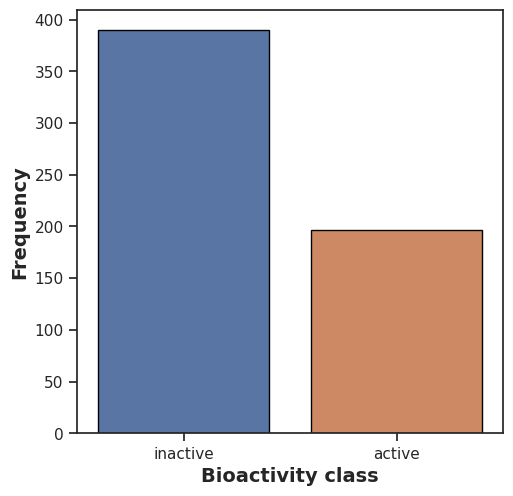

In [46]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

import boto3

# Initialize the Boto3 S3 client using the default credentials provider chain
s3_client = boto3.client('s3')

# Replace 'YOUR_BUCKET_NAME' with the actual name of your S3 bucket
bucket_name = 'project1cc1'

# Replace 'local_pdf_file.pdf' with the path to the PDF file you want to upload
local_pdf_file = 'plot_bioactivity_class.pdf'

# Replace 'remote_pdf_file.pdf' with the desired file name in your S3 bucket
remote_pdf_file = 'plot_bioactivity_class.pdf'

# Read the PDF file as bytes
with open(local_pdf_file, 'rb') as f:
    pdf_bytes = f.read()

# Upload the PDF bytes to S3
s3_client.put_object(Bucket=bucket_name, Key=remote_pdf_file, Body=pdf_bytes)

print(f'PDF file uploaded to {bucket_name}/{remote_pdf_file}')


PDF file uploaded to project1cc1/plot_MW_vs_LogP.pdf


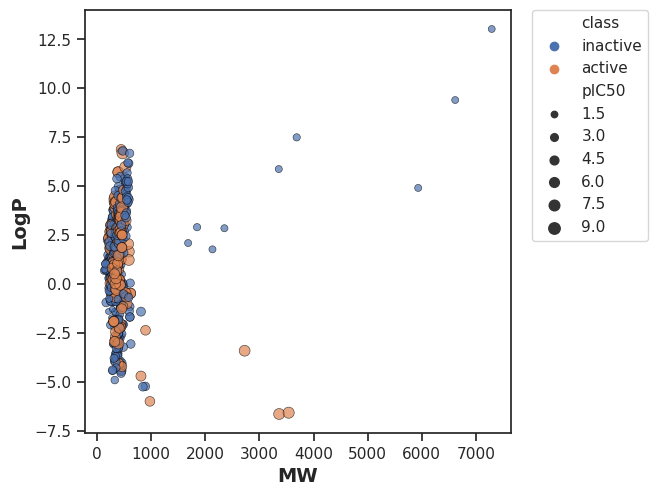

In [47]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

import boto3

# Initialize the Boto3 S3 client using the default credentials provider chain
s3_client = boto3.client('s3')

# Replace 'YOUR_BUCKET_NAME' with the actual name of your S3 bucket
bucket_name = 'project1cc1'

# Replace 'local_pdf_file.pdf' with the path to the PDF file you want to upload
local_pdf_file = 'plot_MW_vs_LogP.pdf'

# Replace 'remote_pdf_file.pdf' with the desired file name in your S3 bucket
remote_pdf_file = 'plot_MW_vs_LogP.pdf'

# Read the PDF file as bytes
with open(local_pdf_file, 'rb') as f:
    pdf_bytes = f.read()

# Upload the PDF bytes to S3
s3_client.put_object(Bucket=bucket_name, Key=remote_pdf_file, Body=pdf_bytes)

print(f'PDF file uploaded to {bucket_name}/{remote_pdf_file}')

PDF file uploaded to project1cc1/plot_ic50.pdf


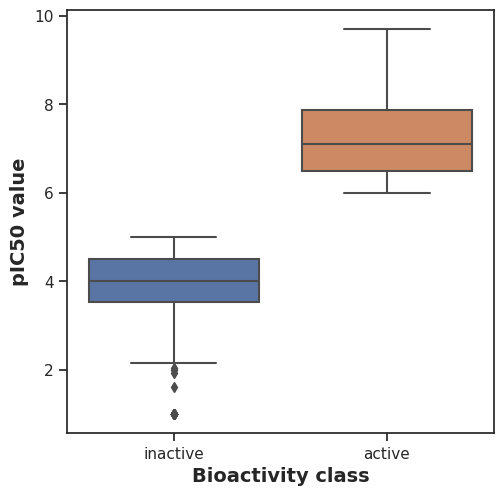

In [48]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')


import boto3

# Initialize the Boto3 S3 client using the default credentials provider chain
s3_client = boto3.client('s3')

# Replace 'YOUR_BUCKET_NAME' with the actual name of your S3 bucket
bucket_name = 'project1cc1'

# Replace 'local_pdf_file.pdf' with the path to the PDF file you want to upload
local_pdf_file = 'plot_ic50.pdf'

# Replace 'remote_pdf_file.pdf' with the desired file name in your S3 bucket
remote_pdf_file = 'plot_ic50.pdf'

# Read the PDF file as bytes
with open(local_pdf_file, 'rb') as f:
    pdf_bytes = f.read()

# Upload the PDF bytes to S3
s3_client.put_object(Bucket=bucket_name, Key=remote_pdf_file, Body=pdf_bytes)

print(f'PDF file uploaded to {bucket_name}/{remote_pdf_file}')

In [49]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,76830.0,2.879852e-87,0.05,Different distribution (reject H0)


PDF file uploaded to project1cc1/plot_MW.pdf


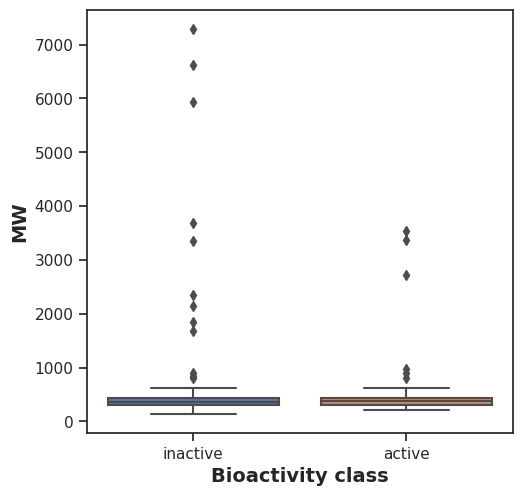

In [50]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')


import boto3

# Initialize the Boto3 S3 client using the default credentials provider chain
s3_client = boto3.client('s3')

# Replace 'YOUR_BUCKET_NAME' with the actual name of your S3 bucket
bucket_name = 'project1cc1'

# Replace 'local_pdf_file.pdf' with the path to the PDF file you want to upload
local_pdf_file = 'plot_MW.pdf'

# Replace 'remote_pdf_file.pdf' with the desired file name in your S3 bucket
remote_pdf_file = 'plot_MW.pdf'

# Read the PDF file as bytes
with open(local_pdf_file, 'rb') as f:
    pdf_bytes = f.read()

# Upload the PDF bytes to S3
s3_client.put_object(Bucket=bucket_name, Key=remote_pdf_file, Body=pdf_bytes)

print(f'PDF file uploaded to {bucket_name}/{remote_pdf_file}')

In [51]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,41330.5,0.133003,0.05,Same distribution (fail to reject H0)


PDF file uploaded to project1cc1/plot_LogP.pdf


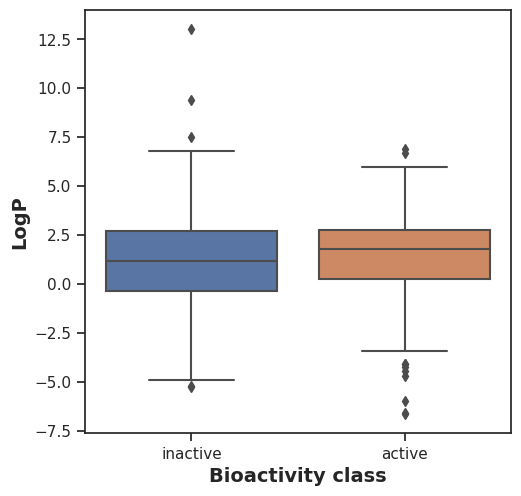

In [52]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

import boto3

# Initialize the Boto3 S3 client using the default credentials provider chain
s3_client = boto3.client('s3')

# Replace 'YOUR_BUCKET_NAME' with the actual name of your S3 bucket
bucket_name = 'project1cc1'

# Replace 'local_pdf_file.pdf' with the path to the PDF file you want to upload
local_pdf_file = 'plot_LogP.pdf'

# Replace 'remote_pdf_file.pdf' with the desired file name in your S3 bucket
remote_pdf_file = 'plot_LogP.pdf'

# Read the PDF file as bytes
with open(local_pdf_file, 'rb') as f:
    pdf_bytes = f.read()

# Upload the PDF bytes to S3
s3_client.put_object(Bucket=bucket_name, Key=remote_pdf_file, Body=pdf_bytes)

print(f'PDF file uploaded to {bucket_name}/{remote_pdf_file}')

In [53]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,42003.5,0.064426,0.05,Same distribution (fail to reject H0)


PDF file uploaded to project1cc1/plot_NumHDonors.pdf


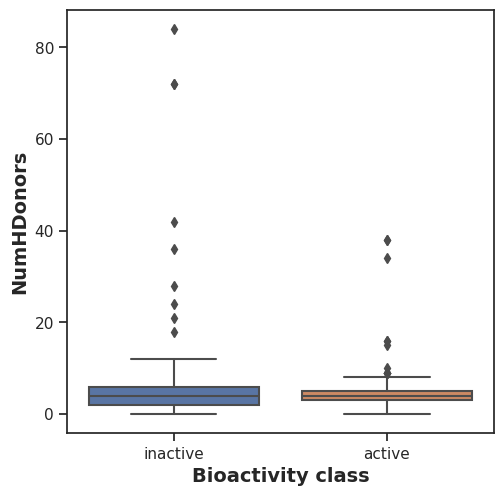

In [54]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

import boto3

# Initialize the Boto3 S3 client using the default credentials provider chain
s3_client = boto3.client('s3')

# Replace 'YOUR_BUCKET_NAME' with the actual name of your S3 bucket
bucket_name = 'project1cc1'

# Replace 'local_pdf_file.pdf' with the path to the PDF file you want to upload
local_pdf_file = 'plot_NumHDonors.pdf'

# Replace 'remote_pdf_file.pdf' with the desired file name in your S3 bucket
remote_pdf_file = 'plot_NumHDonors.pdf'

# Read the PDF file as bytes
with open(local_pdf_file, 'rb') as f:
    pdf_bytes = f.read()

# Upload the PDF bytes to S3
s3_client.put_object(Bucket=bucket_name, Key=remote_pdf_file, Body=pdf_bytes)

print(f'PDF file uploaded to {bucket_name}/{remote_pdf_file}')

In [55]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,38117.5,0.876744,0.05,Same distribution (fail to reject H0)


PDF file uploaded to project1cc1/plot_NumHAcceptors.pdf


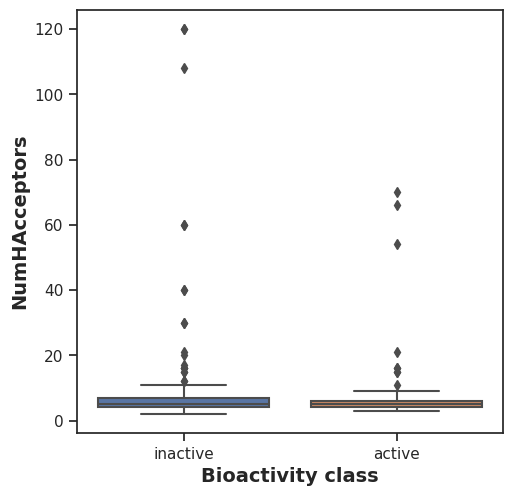

In [56]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

# Initialize the Boto3 S3 client using the default credentials provider chain
s3_client = boto3.client('s3')

# Replace 'YOUR_BUCKET_NAME' with the actual name of your S3 bucket
bucket_name = 'project1cc1'

# Replace 'local_pdf_file.pdf' with the path to the PDF file you want to upload
local_pdf_file = 'plot_NumHAcceptors.pdf'

# Replace 'remote_pdf_file.pdf' with the desired file name in your S3 bucket
remote_pdf_file = 'plot_NumHAcceptors.pdf'

# Read the PDF file as bytes
with open(local_pdf_file, 'rb') as f:
    pdf_bytes = f.read()

# Upload the PDF bytes to S3
s3_client.put_object(Bucket=bucket_name, Key=remote_pdf_file, Body=pdf_bytes)

print(f'PDF file uploaded to {bucket_name}/{remote_pdf_file}')

In [57]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,34505.5,0.039305,0.05,Different distribution (reject H0)


In [58]:
df6 = pd.read_csv('human_sero_bioactivity_04_data_3class_pIC50.csv')
df6

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL397352,CC(=O)N1C[C@H](O)C[C@@H]1C(=O)O,inactive,173.168,-0.9473,2.0,3.0,4.312204
1,1,CHEMBL1229,CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@@...,intermediate,312.410,1.2854,2.0,5.0,5.974694
2,2,CHEMBL392199,COC(=O)[C@@H]1C[C@@H](N)CN1C(=O)[C@@H](N)CC(C)C,inactive,257.334,-0.5390,2.0,5.0,4.318668
3,3,CHEMBL414724,N[C@H]1C[C@@H](C(=O)NO)N(C(=O)Cc2ccccc2Nc2c(Cl...,intermediate,423.300,2.7131,4.0,5.0,5.447332
4,4,CHEMBL393969,N[C@H]1C[C@@H](C(=O)O)N(C(=O)Cc2ccccc2Nc2c(Cl)...,inactive,408.285,3.2923,3.0,4.0,4.789681
...,...,...,...,...,...,...,...,...,...
767,767,CHEMBL4861754,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCc2cc...,active,462.547,1.8608,5.0,6.0,6.486782
768,768,CHEMBL4871590,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCc2cc...,active,462.547,1.8608,5.0,6.0,6.246417
769,769,CHEMBL4872588,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCC2CC...,intermediate,396.488,1.0620,5.0,5.0,5.386053
770,770,CHEMBL4863007,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNC2CCO...,intermediate,426.514,0.8310,5.0,6.0,5.918293


In [59]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df6[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [60]:
df7 = pd.read_csv('molecule.smi')
df7

,CC(=O)N1C[C@H](O)C[C@@H]1C(=O)O\tCHEMBL397352
0,CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@@...
1,COC(=O)[C@@H]1C[C@@H](N)CN1C(=O)[C@@H](N)CC(C)...
2,N[C@H]1C[C@@H](C(=O)NO)N(C(=O)Cc2ccccc2Nc2c(Cl...
3,N[C@H]1C[C@@H](C(=O)O)N(C(=O)Cc2ccccc2Nc2c(Cl)...
4,O=C(NO)[C@@H]1C[C@@H](O)CN1C(=O)Cc1ccccc1Nc1c(...
...,...
766,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCc2cc...
767,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCc2cc...
768,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNCC2CC...
769,CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](NC(=O)NNC2CCO...


In [61]:
! wget https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
! unzip fingerprints_xml.zip

--2023-08-20 14:55:29--  https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip [following]
--2023-08-20 14:55:29--  https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10871 (11K) [application/zip]
Saving to: ‘fingerprints_xml.zip’

100%[======================================>] 10,871      --.-K/s   in 0s      

2023-08-20 14:55:29 (77.8 MB/s) - ‘fingerprints_xml.zip’ saved [10871/10871]

Archive:  fingerprints_xm

In [62]:
import boto3

# Initialize the Boto3 S3 client using the default credentials provider chain
s3_client = boto3.client('s3')

# Replace 'YOUR_BUCKET_NAME' with the actual name of your S3 bucket
bucket_name = 'project1cc1'

# Replace 'local_zip_file.zip' with the path to the downloaded ZIP file
local_zip_file = 'fingerprints_xml.zip'

# Replace 'remote_zip_file.zip' with the desired file name in your S3 bucket
remote_zip_file = 'remote_zip_file.zip'

# Upload the ZIP file to S3
s3_client.upload_file(local_zip_file, bucket_name, remote_zip_file)

print(f'ZIP file uploaded to {bucket_name}/{remote_zip_file}')


ZIP file uploaded to project1cc1/remote_zip_file.zip


In [63]:
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [64]:
#Creating a list of present files
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

In [65]:
#Creating Data Dictionary
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml',
 'Substructure': 'SubstructureFingerprinter.xml'}

In [66]:
fp['PubChem']

'PubchemFingerprinter.xml'

In [67]:
#Setting the fingerprint module
 
 
fingerprint = 'PubChem'
 
fingerprint_output_file = ''.join([fingerprint,'.csv']) #Substructure.csv
fingerprint_descriptortypes = fp[fingerprint]
padeldescriptor(mol_dir='molecule.smi', 
                d_file=fingerprint_output_file, #'Substructure.csv'
                #descriptortypes='SubstructureFingerprint.xml', 
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [68]:
df3_X = pd.read_csv(fingerprint_output_file)
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL397352,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL1229,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL392199,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL414724,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL393969,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,CHEMBL4861754,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
768,CHEMBL4871590,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
769,CHEMBL4872588,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
770,CHEMBL4863007,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df3_X.columns

Index(['Name', 'PubchemFP0', 'PubchemFP1', 'PubchemFP2', 'PubchemFP3',
       'PubchemFP4', 'PubchemFP5', 'PubchemFP6', 'PubchemFP7', 'PubchemFP8',
       ...
       'PubchemFP871', 'PubchemFP872', 'PubchemFP873', 'PubchemFP874',
       'PubchemFP875', 'PubchemFP876', 'PubchemFP877', 'PubchemFP878',
       'PubchemFP879', 'PubchemFP880'],
      dtype='object', length=882)

In [70]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
768,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
769,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
770,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df3_Y = df6['pIC50']
df3_Y

0      4.312204
1      5.974694
2      4.318668
3      5.447332
4      4.789681
         ...   
767    6.486782
768    6.246417
769    5.386053
770    5.918293
771    6.595166
Name: pIC50, Length: 772, dtype: float64

In [72]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)

# Step 2: Create a new column with the categories
bins = [0, 5, 7, np.inf]  # The bin edges: [0, 5), [5, 7), [7, inf)
labels = ['Low', 'Medium', 'High']  # The bin labels
dataset3['pIC50_category'] = pd.cut(dataset3['pIC50'], bins=bins, labels=labels)

from sklearn.preprocessing import LabelEncoder

# Step 1: Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Step 2: Fit and transform the 'pIC50_category' column to get numeric labels
dataset3['pIC50_category_encoded'] = label_encoder.fit_transform(dataset3['pIC50_category'])
dataset3 = dataset3.drop(['pIC50', 'pIC50_category'], axis=1)

# Step 3: Display the mapping between original category labels and encoded labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Display the first few rows of the DataFrame to verify and the label mapping
dataset3.head(), label_mapping


(   PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5   
 0           1           1           0           0           0           0  \
 1           1           1           1           0           0           0   
 2           1           1           1           0           0           0   
 3           1           1           1           0           0           0   
 4           1           1           1           0           0           0   
 
    PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  ...  PubchemFP872   
 0           0           0           0           1  ...             0  \
 1           0           0           0           1  ...             0   
 2           0           0           0           1  ...             0   
 3           0           0           0           1  ...             0   
 4           0           0           0           1  ...             0   
 
    PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  PubchemFP877   
 0            

In [73]:
dataset3.to_csv('human_serotonin_bioactivity_06_data_3class_pIC50_pubchem_fp.csv', index=False)

In [74]:
import boto3
import pandas as pd

# Initialize the Boto3 S3 client using the default credentials provider chain
s3_client = boto3.client('s3')

# Replace 'YOUR_BUCKET_NAME' with the actual name of your S3 bucket
bucket_name = 'project1cc1'

# Specify the local CSV file name
local_csv_file = 'human_serotonin_bioactivity_06_data_3class_pIC50_pubchem_fp.csv'

# Specify the desired S3 file path
s3_file_path = 'human_serotonin_bioactivity_06_data_3class_pIC50_pubchem_fp.csv'


# Write the DataFrame directly to a CSV string
csv_string = dataset3.to_csv(index=False)

# Convert the CSV string to bytes
csv_bytes = bytes(csv_string, 'utf-8')
df7 = pd.read_csv(io.StringIO(csv_string))
# Upload the bytes to S3
s3_client.put_object(Bucket=bucket_name, Key=s3_file_path, Body=csv_bytes)

print(f'CSV file uploaded to {bucket_name}/{s3_file_path}')


CSV file uploaded to project1cc1/human_serotonin_bioactivity_06_data_3class_pIC50_pubchem_fp.csv


In [75]:
df7 = pd.read_csv('human_serotonin_bioactivity_06_data_3class_pIC50_pubchem_fp.csv')

In [76]:
X = df7.drop('pIC50_category_encoded', axis=1)
X
Y = df7.pIC50_category_encoded
Y


0      1
1      2
2      1
3      2
4      1
      ..
767    2
768    2
769    2
770    2
771    2
Name: pIC50_category_encoded, Length: 772, dtype: int64

In [77]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [79]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.3319026333495765

In [116]:
from sklearn.model_selection import train_test_split

# Function to split the data
def split_data(df7):
    train, test_and_validate = train_test_split(df7, test_size=0.2, random_state=42, stratify=df7['pIC50_category_encoded'])
    test, validate = train_test_split(test_and_validate, test_size=0.5, random_state=42, stratify=test_and_validate['pIC50_category_encoded'])
    return train, validate, test

# Split the data into training, validation, and test sets
train, validate, test = split_data(df7)

# Check the distribution of the target variable in the training, validation, and test sets
train_distribution = train['pIC50_category_encoded'].value_counts(normalize=True)
validate_distribution = validate['pIC50_category_encoded'].value_counts(normalize=True)
test_distribution = test['pIC50_category_encoded'].value_counts(normalize=True)

train_distribution, validate_distribution, test_distribution


(pIC50_category_encoded
 1    0.505673
 2    0.358185
 0    0.136143
 Name: proportion, dtype: float64,
 pIC50_category_encoded
 1    0.500000
 2    0.358974
 0    0.141026
 Name: proportion, dtype: float64,
 pIC50_category_encoded
 1    0.506494
 2    0.363636
 0    0.129870
 Name: proportion, dtype: float64)

In [118]:
# Import necessary SageMaker libraries
import sagemaker
from sagemaker import get_execution_role
from sagemaker.amazon.amazon_estimator import RecordSet

# SageMaker setup
role = get_execution_role()  # Replace this with your IAM role if running outside SageMaker

# Instantiate the LinearLearner estimator object for multi-class classification
classifier_estimator = sagemaker.LinearLearner(role=role,
                                               instance_count=1,
                                               instance_type='ml.m4.xlarge',
                                               predictor_type='multiclass_classifier',
                                               num_classes=3)  # We have 3 classes

# Convert DataFrames to 'float32'
train = train.astype('float32')
validate = validate.astype('float32')
test = test.astype('float32')

# Create RecordSet with 'float32' data
train_record_set = classifier_estimator.record_set(train.drop(['pIC50_category_encoded'], axis=1).values, 
                                                   labels=train['pIC50_category_encoded'].values)

# Train the model
classifier_estimator.fit(train_record_set)


INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating training-job with name: linear-learner-2023-08-20-16-04-07-525


2023-08-20 16:04:07 Starting - Starting the training job......
2023-08-20 16:05:04 Starting - Preparing the instances for training............
2023-08-20 16:07:06 Downloading - Downloading input data
2023-08-20 16:07:06 Training - Downloading the training image.........
2023-08-20 16:08:22 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
[08/20/2023 16:08:38 INFO 140225877546816] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 

In [119]:
# Deploy the trained model to create a predictor
classifier_predictor = classifier_estimator.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

# Convert validation set to NumPy array
validate_features = validate.drop(['pIC50_category_encoded'], axis=1).values

# Make predictions using the deployed model
prediction_result = classifier_predictor.predict(validate_features)

# Extract predicted class labels
predicted_labels = [x.label['predicted_label'].float32_tensor.values[0] for x in prediction_result]

# Evaluate the model using metrics like accuracy, precision, recall, etc.
from sklearn.metrics import accuracy_score, classification_report

# Calculate the accuracy of the model
accuracy = accuracy_score(validate['pIC50_category_encoded'], predicted_labels)

# Generate a classification report
report = classification_report(validate['pIC50_category_encoded'], predicted_labels, target_names=['Class 0', 'Class 1', 'Class 2'])

# Delete the endpoint to avoid incurring extra costs
classifier_predictor.delete_endpoint()

print(f"Model Accuracy: {accuracy}")
print("Classification Report:")
print(report)


INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating model with name: linear-learner-2023-08-20-16-09-58-517
INFO:sagemaker:Creating endpoint-config with name linear-learner-2023-08-20-16-09-58-517
INFO:sagemaker:Creating endpoint with name linear-learner-2023-08-20-16-09-58-517


-------!

INFO:sagemaker:Deleting endpoint configuration with name: linear-learner-2023-08-20-16-09-58-517
INFO:sagemaker:Deleting endpoint with name: linear-learner-2023-08-20-16-09-58-517


Model Accuracy: 0.7307692307692307
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.60      0.27      0.37        11
     Class 1       0.79      0.85      0.81        39
     Class 2       0.68      0.75      0.71        28

    accuracy                           0.73        78
   macro avg       0.69      0.62      0.63        78
weighted avg       0.72      0.73      0.72        78



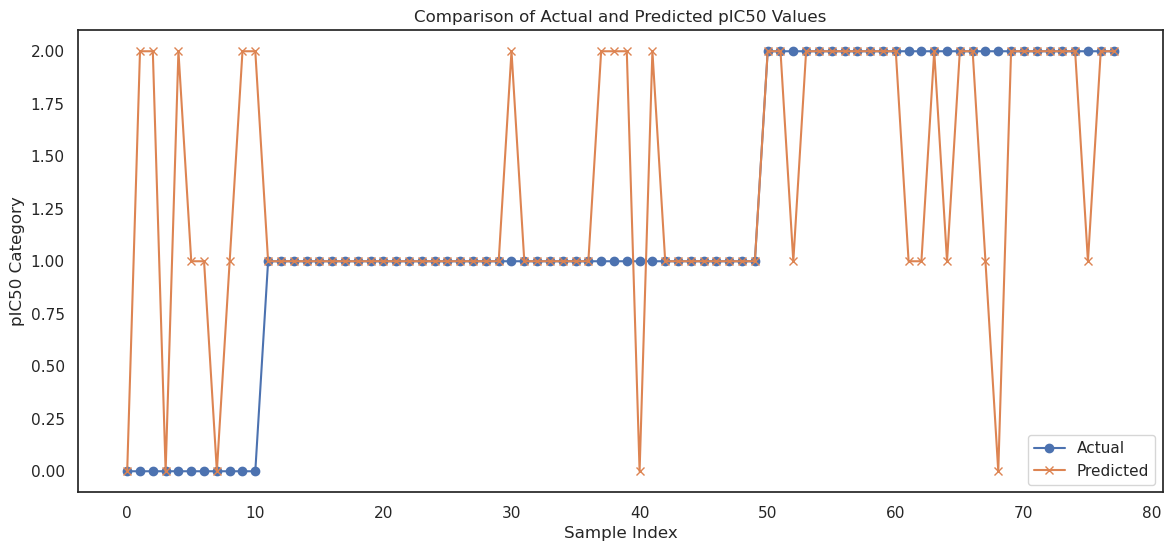

In [121]:
import matplotlib.pyplot as plt
import numpy as np


# Actual pIC50 values
actual_labels = validate['pIC50_category_encoded'].values

# Sort both actual and predicted labels for better visualization
sorted_indices = np.argsort(actual_labels)
sorted_actual_labels = actual_labels[sorted_indices]
sorted_predicted_labels = np.array(predicted_labels)[sorted_indices]

# Plot the graph
plt.figure(figsize=(14, 6))
plt.plot(sorted_actual_labels, label='Actual', marker='o')
plt.plot(sorted_predicted_labels, label='Predicted', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('pIC50 Category')
plt.title('Comparison of Actual and Predicted pIC50 Values')
plt.legend()
plt.show()
